In [13]:
import sys
%load_ext autoreload
%autoreload 2
sys.path.append("../base")
sys.path.append("../data_provider")
sys.path.append("../models")
from common import *
from data_provider import DataProvider
import simple_linear_regression as simple_lr
import lasso_linear_regression as lasso_lr
import ridge_linear_regression as ridge_lr
import catboost_regression as catboost_r

data_provider = DataProvider()
x_raw = data_provider.x_raw
y_raw = data_provider.y_raw

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


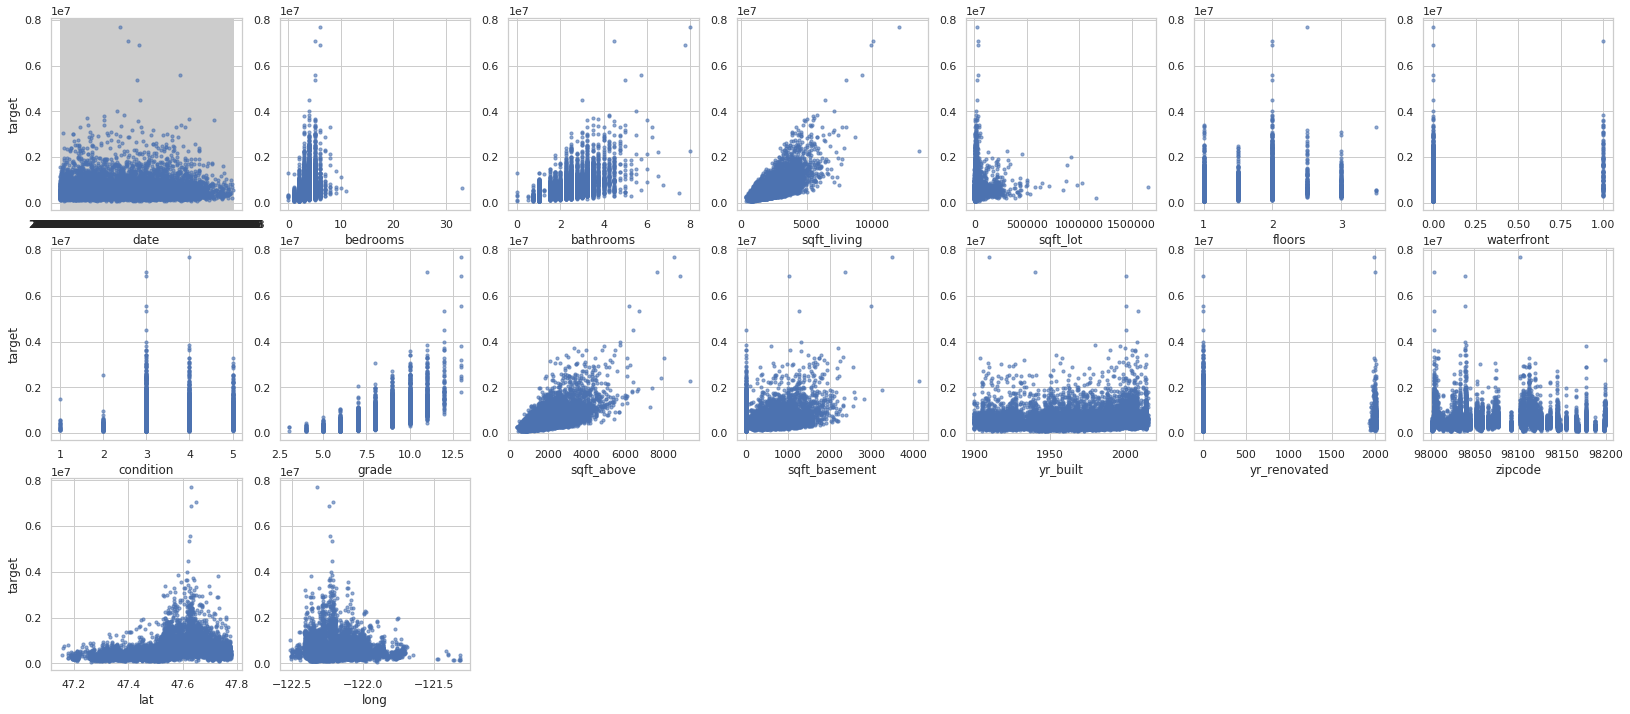

In [2]:
draw_pair_plot(x_raw, y_raw)

In [15]:
x_train = data_provider.processed_x_train()
y_train = data_provider.processed_y()

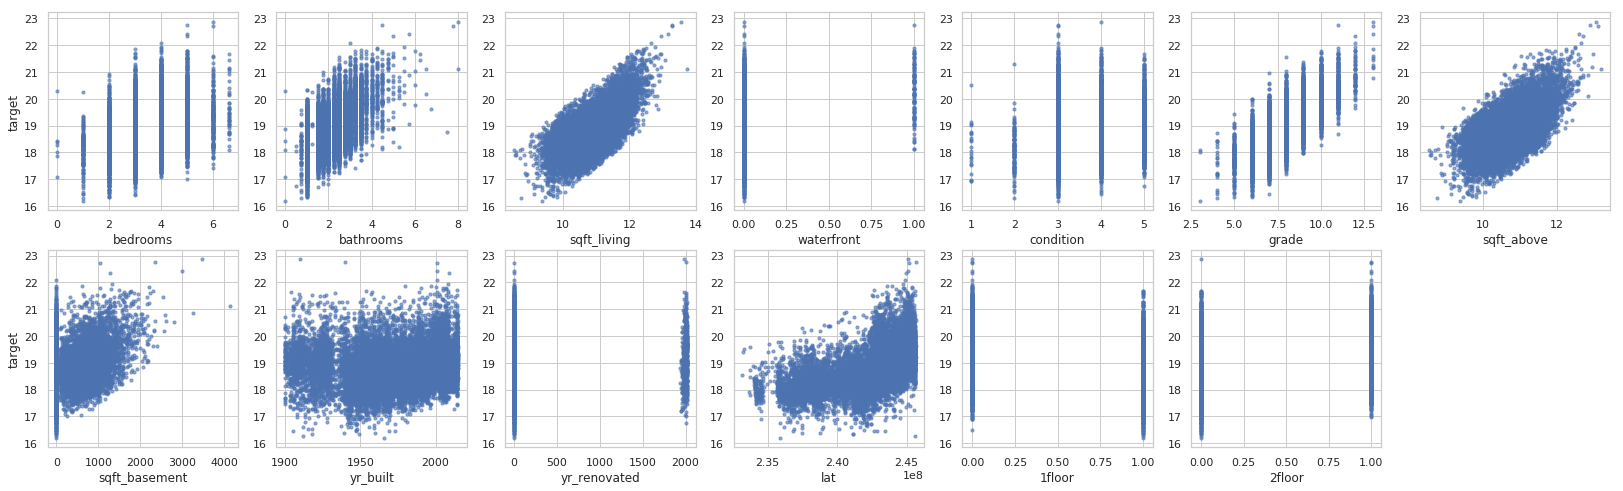

In [6]:
draw_pair_plot(x_train, y_train)

In [16]:
def train_and_test_simple_model():
    simple_model = simple_lr.build_model(x_train, y_train)
    train_prediction = data_provider.revert_y(simple_model.predict(x_train))
    print("simple model train prediction mape score:", mape_score(y_raw, train_prediction))

def train_and_test_lasso_model():
    lasso_model = lasso_lr.build_model(x_train, y_train)

    train_prediction = data_provider.revert_y(lasso_model.predict(x_train))
    print("lasso model train prediction mape score:", mape_score(y_raw, train_prediction))
    
def train_and_test_ridge_model():
    ridge_model = ridge_lr.build_model(x_train, y_train)

    train_prediction = data_provider.revert_y(ridge_model.predict(x_train))
    print("ridge model train prediction mape score:", mape_score(y_raw, train_prediction))
    
def train_and_test_catboost_model():
    catboost_model = catboost_r.build_model(x_train, y_train)

    train_prediction = data_provider.revert_y(catboost_model.predict(x_train))
    print("catboost model train prediction mape score:", mape_score(y_raw, train_prediction))

train_and_test_simple_model()
train_and_test_lasso_model()
train_and_test_ridge_model()

../base/common.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  for i in range(len(y_data.as_matrix())):
../base/common.py:29: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  total += np.abs((y_data.as_matrix()[i][0] - prediction[i]) / y_data.as_matrix()[i][0])


simple model train prediction mape score: [14.10648152]
lasso model train prediction mape score: 18.008113078756733


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.402359e-18
  overwrite_a=True).T


ridge model train prediction mape score: [14.10985813]
